In [3]:
#import required libraries
import pandas as pd
import numpy as np
import os
import requests
import tweepy
import json
from timeit import default_timer as timer
from tweepy import OAuthHandler
import seaborn as sns
import matplotlib.ticker as mtick


In [ ]:
#GATHER

In [4]:
#Gathering Data Source 1
#read file into dataframe
twitter_archive_df = pd.read_csv('/Users/AyomiposiSodeinde/Downloads/Udacity-DE-NanoDegree/archive/wrangling_data/twitter-archive-enhanced.csv')

In [ ]:
#Gathering Data Source 2
#download file programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

image_predictions_df = pd.read_csv("/Users/AyomiposiSodeinde/Downloads/Udacity-DE-NanoDegree/archive/wrangling_data/image_predictions.tsv", sep='\t')

In [ ]:
#Gathering Data Source 3
#get keys from twitter
CONSUMER_KEY = "YOUR CONSUMER KEY"
CONSUMER_SECRET = "YOUR CONSUMER SECRET"
ACCESS_TOKEN = "YOUR ACCESS TOKEN"
ACCESS_TOKEN_SECRET = "YOUR ACCESS TOKEN SECRET"

# Create an instance of the Tweepy API
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [ ]:
# create an empty list to store the data
tweets_data = []

# open the tweet_json.txt file and read each line as a JSON object
with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        # extract the desired information from the JSON object
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        # append the extracted information to the tweets_data list
        tweets_data.append({'tweet_id': tweet_id,
                            'retweet_count': retweet_count,
                            'favorite_count': favorite_count})

# create a pandas DataFrame from the tweets_data list
api_tweets_df = pd.DataFrame(tweets_data, columns=['tweet_id', 'retweet_count', 'favorite_count'])

In [ ]:
#ASSESS

In [5]:
#assess the twitter archive data
twitter_archive_df.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [6]:
twitter_archive_df.info


<bound method DataFrame.info of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id   
0     892420643555336193                    NaN                  NaN  \
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp   
0     2017-08-01 16:23:56 +0000  \
1     2017-08-01 00:17:27 +0000  

In [7]:
twitter_archive_df.name.value_counts()


name
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
              ..
Aqua           1
Chase          1
Meatball       1
Rorie          1
Christoper     1
Name: count, Length: 956, dtype: int64

In [8]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
#assess image predictions data
image_predictions_df.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
image_predictions_df.info


<bound method DataFrame.info of                 tweet_id                                          jpg_url   
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg  \
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_

In [12]:
image_predictions_df.p1.value_counts()


p1
golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: count, Length: 378, dtype: int64

In [13]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
#Assess API Data
api_tweets_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [17]:
api_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [ ]:
api_tweets_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [19]:
#make copies of the dataset for cleaning
twitter_archive_df_clean = twitter_archive_df.copy()
image_predictions_df_clean = image_predictions_df.copy()
api_tweets_df_clean = api_tweets_df.copy()

In [ ]:
#Clean

In [20]:
#Tidiness 1: 
#Define: Join all three tables on tweetid
#Merge the dataframes
#Code:
twitter_archive_df_clean = pd.merge(twitter_archive_df_clean, image_predictions_df_clean, how='inner', on='tweet_id')
twitter_archive_df_clean = pd.merge(twitter_archive_df_clean, api_tweets_df_clean, how='inner', on='tweet_id')

#Save the merged dataframe
twitter_archive_df_clean.to_csv('twitter_archive_df_clean_merged.csv', index=False)

In [21]:
#test
twitter_archive_df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        1496 non-null   object 
 13  doggo                       80 no

In [ ]:
#Tidiness 2:
#Define: Combine the doggo, floofer, pupper puppo columns into one column and name it 'dog_stage'

# Replace NaN values with "None"
columns = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_df_clean[columns] = twitter_archive_df_clean[columns].fillna("None")

# Replace "None" values with an empty string ('')
twitter_archive_df_clean[columns] = twitter_archive_df_clean[columns].replace("None", '')

# Create "dog_stage" column by concatenating values from four columns
twitter_archive_df_clean['dog_stage'] = twitter_archive_df_clean[columns].sum(axis=1)

In [51]:
#test
dog_stage_counts = twitter_archive_df_clean['dog_stage'].value_counts()
print(dog_stage_counts)

dog_stage
                1013
pupper           119
doggo             39
puppo             18
floofer            6
doggopupper        6
doggopuppo         1
doggofloofer       1
Name: count, dtype: int64


In [22]:
#1. Data Quality:
#Define: remove retweets
#Code:
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean["retweeted_status_id"].isnull()]

In [23]:
#test
twitter_archive_df_clean.retweeted_status_id.value_counts()
twitter_archive_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


In [25]:
#2. Data quality:
# Define: Filtering the DataFrame to remove non-dog pictures

#Code:
twitter_archive_df_clean = twitter_archive_df_clean[(twitter_archive_df_clean['p1_dog'] != False) & 
                                                      (twitter_archive_df_clean['p2_dog'] != False) & 
                                                      (twitter_archive_df_clean['p3_dog'] != False)]

In [26]:
#Test
twitter_archive_df_clean.p1_dog.value_counts()
twitter_archive_df_clean.p2_dog.value_counts()
twitter_archive_df_clean.p3_dog.value_counts()

p3_dog
True    1203
Name: count, dtype: int64

In [27]:
#3. Data quality

#Define: move the numerator and denominator to one column for overall rating

#Code:
twitter_archive_df_clean['overall_rating'] = round(twitter_archive_df_clean.rating_numerator / twitter_archive_df_clean.rating_denominator,1)

#test
twitter_archive_df_clean.overall_rating.describe()

/var/folders/gz/gl9syt1d3s3clhr7y47sv5180000gn/T/ipykernel_855/1922194299.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_df_clean['overall_rating'] = round(twitter_archive_df_clean.rating_numerator / twitter_archive_df_clean.rating_denominator,1)


count    1203.000000
mean        1.097340
std         0.193899
min         0.200000
25%         1.000000
50%         1.100000
75%         1.200000
max         3.400000
Name: overall_rating, dtype: float64

In [28]:
#4. Data quality
#Define: Replace 'None', 'a', 'an' and 'the' in the name field with 'nan'

#code:
twitter_archive_df_clean['name'] = twitter_archive_df_clean['name'].replace(['a', 'an', 'the', 'none'], float('nan'))

twitter_archive_df_clean['name'] = twitter_archive_df_clean['name'].replace(r'\b(?:a|an|none|the)\b', float('nan'), regex=True)

#test
twitter_archive_df_clean.name.value_counts()
print(twitter_archive_df_clean[twitter_archive_df_clean['name'].isin(['a', 'an', 'the', 'none'])])

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, retweet_count, favorite_count, overall_rating]
Index: []

[0 rows x 31 columns]


/var/folders/gz/gl9syt1d3s3clhr7y47sv5180000gn/T/ipykernel_855/2834293850.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_df_clean['name'] = twitter_archive_df_clean['name'].replace(['a', 'an', 'the', 'none'], float('nan'))
/var/folders/gz/gl9syt1d3s3clhr7y47sv5180000gn/T/ipykernel_855/2834293850.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_df_clean['name'] = twitter_archive_df_clean['name'].replace(r'\b(?:a|an|none|the)\b', float('nan'), regex=True)


In [29]:
#5. Data quality
#Define: Drop p2_dog_y, p3_dog_y and rename p1_dog_y to 'Dog_confrimed' for better description

#code:
#drop unnecessary column
twitter_archive_df_clean = twitter_archive_df_clean.drop(['p2_dog', 'p3_dog'], axis=1)
#rename column
twitter_archive_df_clean = twitter_archive_df_clean.rename(columns={'p1_dog': 'dog_confirmed'})


In [30]:

#test
print(twitter_archive_df_clean['dog_confirmed'])

1       True
2       True
4       True
7       True
8       True
        ... 
2068    True
2069    True
2070    True
2071    True
2072    True
Name: dog_confirmed, Length: 1203, dtype: bool


In [ ]:
#6. Data quality
#Define: Convert the data type for the dog_stage to category

#code:
twitter_archive_df_clean['dog_stage'] = twitter_archive_df_clean['dog_stage'].astype('category')

#test
# Check the number of occurrences for each unique value
dog_stage_counts2 = twitter_archive_df_clean['dog_stage'].value_counts()
print(dog_stage_counts2)

dog_stage
                1013
pupper           119
doggo             39
puppo             18
doggopupper        6
floofer            6
doggofloofer       1
doggopuppo         1
Name: count, dtype: int64


In [33]:
#7 Quality
#Define: change tweet_id data type to string

#code
twitter_archive_df_clean['tweet_id'] = twitter_archive_df_clean['tweet_id'].astype(str)

#test
print(twitter_archive_df_clean['tweet_id'].dtype)

object


In [34]:
#8 Quality
#Define: change timestamp data type to datetime
twitter_archive_df_clean['timestamp'] = pd.to_datetime(twitter_archive_df_clean['timestamp'])

#test
print(twitter_archive_df_clean['timestamp'].dtype)

datetime64[ns, UTC]


In [35]:
#Storing Data


In [ ]:
#Store data to csv
twitter_archive_df_clean.to_csv('twitter_archive_master.csv', index=False)

In [ ]:
#Analyses

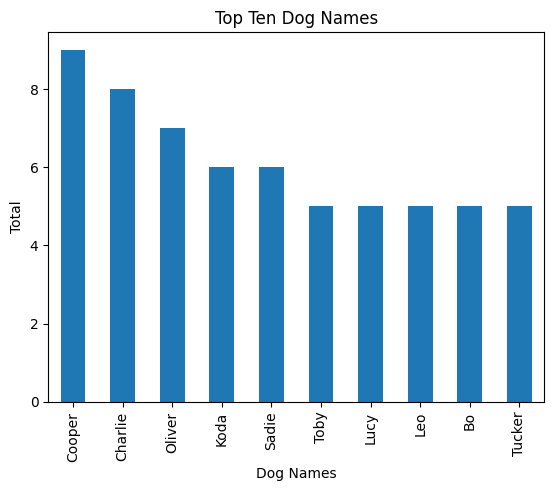

In [37]:
#1 Insight:
#Top ten Dog_names:

import matplotlib.pyplot as plt


# Group the DataFrame by dog names and count the occurrences
name_counts = twitter_archive_df_clean['name'].value_counts().head(10)

# Create a new DataFrame with the top ten dog names and their counts
top_names_df = pd.DataFrame({'Dog Name': name_counts.index, 'Count': name_counts.values})

# Set the 'Dog Name' column as the index
top_names_df.set_index('Dog Name', inplace=True)

# Plot the bar chart
top_names_df.plot(kind='bar', legend=False)

# Add labels and title
plt.xlabel('Dog Names')
plt.ylabel('Total')
plt.title('Top Ten Dog Names')

# Show the plot
plt.show()

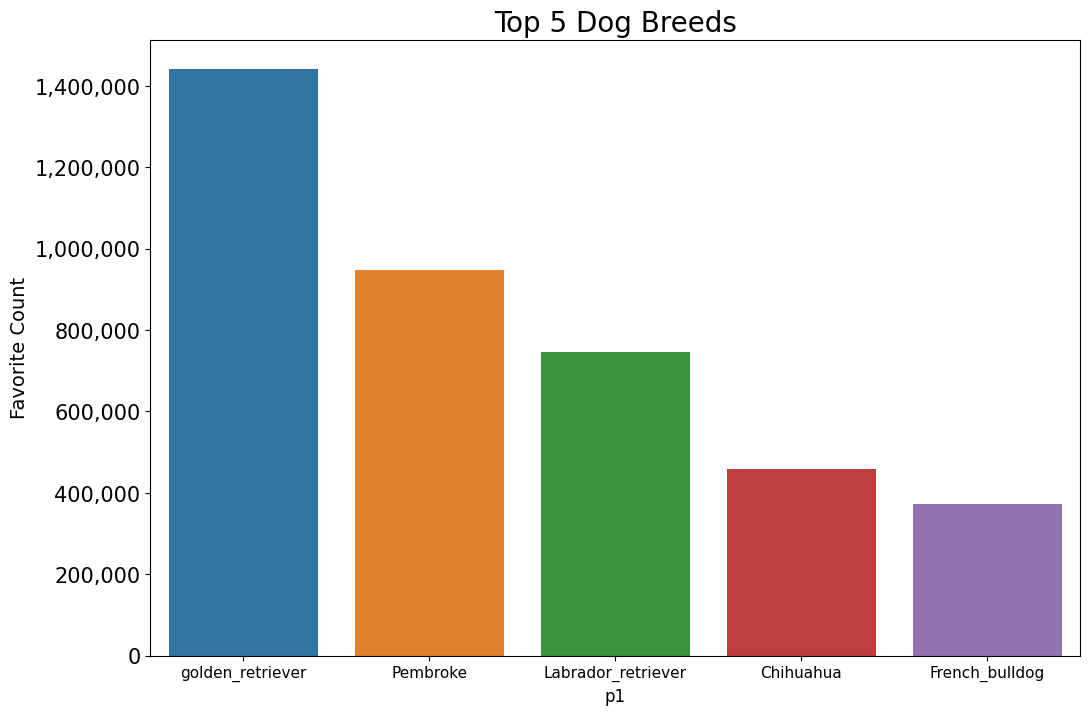

In [50]:
#2Insight
#Top 5 Dog Breeds
# Group the DataFrame by dog_breed(predicted p1) and calculate the sum of favorite counts
top5DogBreed = twitter_archive_df_clean.groupby('p1')['favorite_count'].sum().nlargest(5)

plt.figure(figsize=(12, 8))
plt.title('Top 5 Dog Breeds', fontsize=20)
plt.xticks(fontsize=11)
plt.yticks(fontsize=15)
plt.xlabel('Dog Breed', fontsize=12)
plt.ylabel('Favorite Count', fontsize=14)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))
sns.barplot(x=top5DogBreed.index, y=top5DogBreed.values)

plt.show()


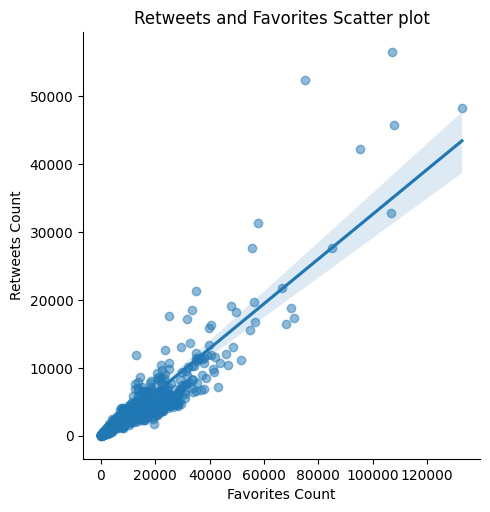

In [49]:
#3 Insight
#Correleation between the retweets and favorites.

sns.lmplot(x='favorite_count', y='retweet_count', data=twitter_archive_df_clean, scatter_kws={'alpha':0.5})

plt.xlabel('Favorites Count')
plt.ylabel('Retweets Count')
plt.title('Retweets and Favorites Scatter plot')

plt.show()
